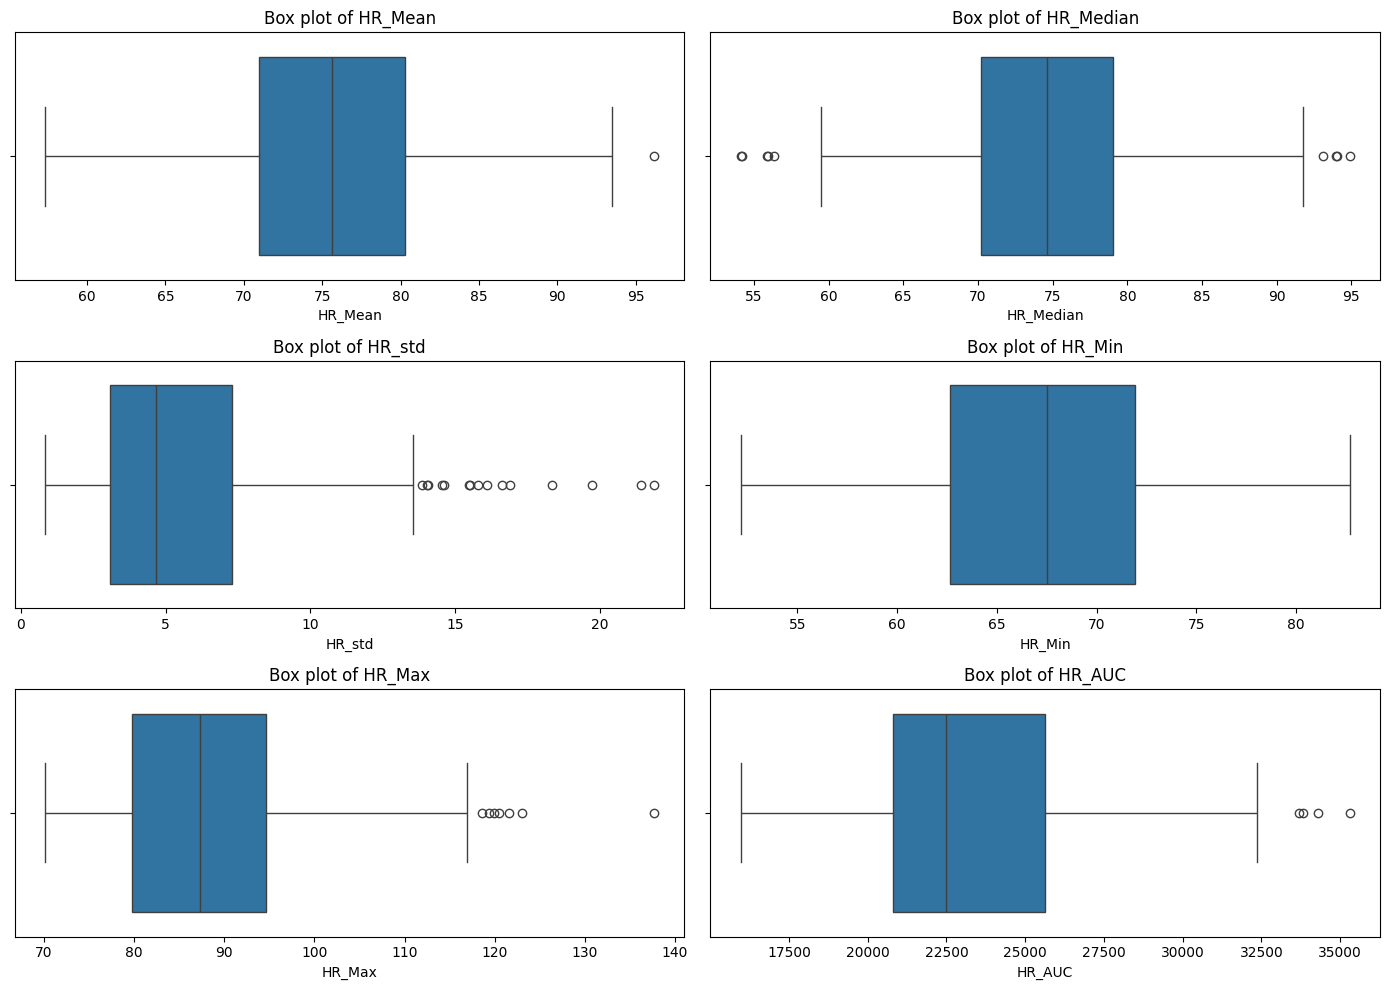

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
file_path = 'HR_data.csv'
hr_data = pd.read_csv(file_path)
# List of features to plot
features = ['HR_Mean', 'HR_Median', 'HR_std', 'HR_Min', 'HR_Max', 'HR_AUC']

plt.figure(figsize=(14, 10))

for i, feature in enumerate(features, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(x=data[feature])
    plt.title(f'Box plot of {feature}')

plt.tight_layout()
plt.show()


In [25]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

# Load your data
# Example of loading data (specify your actual path and columns)
df = pd.read_csv('HR_data.csv')
X = df.drop(['Frustrated', 'Individual', 'Unnamed: 0', 'Cohort', 'Puzzler', 'Round', 'Phase'], axis=1)
y = df['Frustrated']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize models
logistic_model = LogisticRegression(max_iter=1000)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train and evaluate Logistic Regression
logistic_model.fit(X_train_scaled, y_train)
logistic_pred = logistic_model.predict(X_test_scaled)
logistic_accuracy = accuracy_score(y_test, logistic_pred)

# Train and evaluate Random Forest
rf_model.fit(X_train_scaled, y_train)
rf_pred = rf_model.predict(X_test_scaled)
rf_accuracy = accuracy_score(y_test, rf_pred)

# Print the average performance
print("Accuracy (Logistic Regression):", logistic_accuracy)
print("Accuracy (Random Forest):", rf_accuracy)


Accuracy (Logistic Regression): 0.08823529411764706
Accuracy (Random Forest): 0.14705882352941177


In [29]:
# Function to perform cross-validation
def evaluate_model(model, X, y, groups):
    scores = []
    for train_index, test_index in gkf.split(X, y, groups):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        score = accuracy_score(y_test, y_pred)
        scores.append(score)
    return scores

# Evaluate models
logistic_scores = evaluate_model(logistic_model, X_scaled, y, groups)
rf_scores = evaluate_model(rf_model, X_scaled, y, groups)

# Print the average performance
print("Average accuracy (Logistic Regression):", np.mean(logistic_scores))
print("Average accuracy (Random Forest):", np.mean(rf_scores))
print(logistic_scores)
print(rf_scores)

Average accuracy (Logistic Regression): 0.19166666666666665
Average accuracy (Random Forest): 0.175
[0.1111111111111111, 0.2222222222222222, 0.1388888888888889, 0.19444444444444445, 0.2916666666666667]
[0.08333333333333333, 0.1388888888888889, 0.2222222222222222, 0.1388888888888889, 0.2916666666666667]


In [28]:
import numpy as np
from sklearn.model_selection import GroupKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Loading the data from the uploaded CSV file
file_path = 'HR_data.csv'
hr_data = pd.read_csv(file_path)

# Data setup
X = hr_data.drop(columns=['Individual', 'Unnamed: 0', 'Cohort', 'Puzzler', 'Frustrated', 'Round', 'Phase'])
y = hr_data['Frustrated']  # Adjust if 'Frustrated' isn't the target
groups = hr_data['Individual']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Set up GroupKFold
gkf = GroupKFold(n_splits=5)

# Initialize a model with increased max_iter
model = LogisticRegression(max_iter=1000)

# Perform the group k-fold cross validation
scores = []
for train_index, test_index in gkf.split(X_scaled, y, groups):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Fit the model on the training data
    model.fit(X_train, y_train)
    
    # Predict and evaluate the model on the testing data
    y_pred = model.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    scores.append(score)

# Output the average performance
print("Average accuracy:", np.mean(scores))
print(scores)

Average accuracy: 0.19166666666666665
[0.1111111111111111, 0.2222222222222222, 0.1388888888888889, 0.19444444444444445, 0.2916666666666667]


In [31]:
import numpy as np
from scipy.stats import ttest_rel

# Perform a paired t-test
t_statistic, p_value = ttest_rel(logistic_scores, rf_scores)

print("T-Statistic:", t_statistic)
print("P-Value:", p_value)


T-Statistic: 0.5827715174143587
P-Value: 0.5913196318668537
